Attribute Information:
* 1.model - > Ford Car Brands
* 2.year - >Production Year
* 3.price - >Price of car in $
* 4.transmission - > Automatic,Manual, Semi-Auto
* 5.mileage -> Number of miles traveled
* 6.fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other
* 7.tax -> Annual Tax
* 8.mpg - > Miles per Gallon
* 9.engineSize - > Car's Engine Size


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('/content/ford.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [4]:
catgorical_columns=data[['model','transmission','fuelType']]
numelical_columns=data[['year', 'price','mileage','tax','mpg', 'engineSize']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
data.isnull().sum().reset_index()

,index,0
0,model,0
1,year,0
2,price,0
3,transmission,0
4,mileage,0
5,fuelType,0
6,tax,0
7,mpg,0
8,engineSize,0


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(17812, 9)

In [9]:
data['transmission'].value_counts().reset_index()

,transmission,count
0,Manual,15383
1,Automatic,1354
2,Semi-Auto,1075


In [10]:
data['model'].value_counts()

,count
model,
Fiesta,6509
Focus,4555
Kuga,2208
EcoSport,1127
C-MAX,542
Ka+,523
Mondeo,512
B-MAX,350
S-MAX,294


In [11]:

data.loc[data['fuelType']=='Other','fuelType']='Diesel'

In [12]:
data=data.apply(lambda x:x.str.strip() if x.dtype=='object' else x)

In [13]:
data['model'].value_counts()

,count
model,
Fiesta,6509
Focus,4556
Kuga,2208
EcoSport,1127
C-MAX,542
Ka+,523
Mondeo,512
B-MAX,350
S-MAX,294


In [14]:
data['fuelType'].value_counts()

,count
fuelType,
Petrol,12081
Diesel,5707
Hybrid,22
Electric,2


In [15]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,12269.556310,23381.146362,113.315012,57.908696,1.350623
std,2.052039,4736.285417,19419.011045,62.034603,10.132696,0.432581
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11288.000000,18277.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31098.500000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


<Axes: >

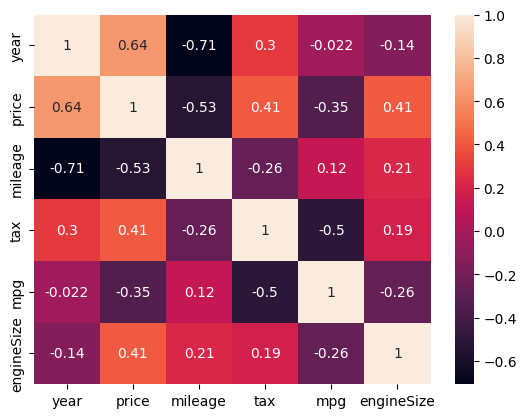

In [16]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [17]:
from datetime import datetime
current_year = datetime.now().year
data['car_age']=current_year-data['year']

In [18]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,8
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,7
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,8
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,6
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,6


In [19]:
data=pd.get_dummies(data,dtype=int)

In [20]:
data.head()

,year,price,mileage,tax,mpg,engineSize,car_age,model_B-MAX,model_C-MAX,model_EcoSport,...,model_Tourneo Connect,model_Tourneo Custom,model_Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,8,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,7,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,8,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,6,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,6,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
y=data['price']
x=data.drop(columns=['price'],index=1)

In [22]:
x

,year,mileage,tax,mpg,engineSize,car_age,model_B-MAX,model_C-MAX,model_EcoSport,model_Edge,...,model_Tourneo Connect,model_Tourneo Custom,model_Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol
0,2017,15944,150,57.7,1.0,8,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,12456,150,57.7,1.0,8,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40.3,1.5,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48.7,1.0,6,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,2015,35432,145,47.9,1.6,10,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,8,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57.7,1.0,11,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67.3,1.6,10,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
17964,2018,5007,145,57.7,1.2,7,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [23]:
data.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age',
       'model_B-MAX', 'model_C-MAX', 'model_EcoSport', 'model_Edge',
       'model_Escort', 'model_Fiesta', 'model_Focus', 'model_Fusion',
       'model_Galaxy', 'model_Grand C-MAX', 'model_Grand Tourneo Connect',
       'model_KA', 'model_Ka+', 'model_Kuga', 'model_Mondeo', 'model_Mustang',
       'model_Puma', 'model_Ranger', 'model_S-MAX', 'model_Streetka',
       'model_Tourneo Connect', 'model_Tourneo Custom',
       'model_Transit Tourneo', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_standard=scaler.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
print(x.shape)
print(y.shape)

In [26]:
# Align both DataFrames/Series
x, y = x.align(y, join='inner', axis=0)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [29]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=Lr.predict(x_test)

In [31]:
r2=r2_score(y_test,y_pred)
r2

0.853344902616103

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_standard,y,test_size=0.20,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("R2:",r2)
print("MAE",mae)

In [ ]:
data['price'].max()

In [32]:
import joblib

# Save model
joblib.dump(Lr, "car_price_model.pkl")

print("✅ Model saved as car_price_model.pkl")


✅ Model saved as car_price_model.pkl


In [33]:
joblib.dump(x.columns, "model_columns.pkl")

['model_columns.pkl']